# Step 1 - Create training data

In [1]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=50, noise=0.2, random_state=42)

In [3]:
X.shape

(50, 2)

In [5]:
y.shape

(50,)

# Step 2 - Plot the training data

In [8]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12,6)

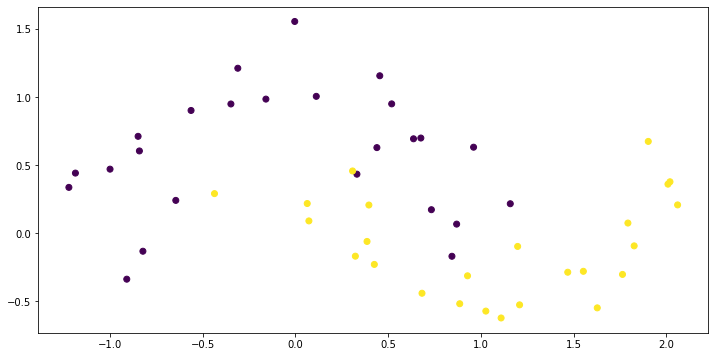

In [9]:
plt.scatter(X[:,0], X[:,1], c=y)

# Step 3 - Add the bias

In [11]:
import numpy as np

In [14]:
def add_bias(X):
    '''
    
    '''
    return np.hstack([X, np.ones((X.shape[0], 1))])

In [16]:
X = add_bias(X)
X

array([[-0.15856989,  0.98480618,  1.        ],
       [ 1.10900374, -0.62160223,  1.        ],
       [ 0.39641523,  0.20740869,  1.        ],
       [ 1.79239122,  0.07511293,  1.        ],
       [-0.84739307,  0.71154296,  1.        ],
       [ 1.90209657,  0.67432213,  1.        ],
       [ 0.0731551 ,  0.09079042,  1.        ],
       [-0.43566685,  0.29122072,  1.        ],
       [ 0.42577731, -0.22851359,  1.        ],
       [-0.64418143,  0.24144478,  1.        ],
       [ 0.11289285,  1.00510013,  1.        ],
       [ 0.96066405,  0.63183812,  1.        ],
       [ 1.46814927, -0.28580296,  1.        ],
       [ 0.5192833 ,  0.94984582,  1.        ],
       [ 0.73327397,  0.17310931,  1.        ],
       [ 0.33197143,  0.43375035,  1.        ],
       [ 1.62726102, -0.54736954,  1.        ],
       [ 2.01908805,  0.37804882,  1.        ],
       [ 2.00824323,  0.36058988,  1.        ],
       [-0.56195047,  0.90148197,  1.        ],
       [ 0.67647169,  0.69909987,  1.   

# Step 4 - Define an activation function

In [18]:
def sigmoid(X):
    return 1/(1+np.exp(-X))

#### Test the sigmoid function

In [19]:
a = np.array([-10.0, -1.0, 0.0, 1.0, 10.0])
expected = np.array([0.0, 0.27, 0.5, 0.73, 1.0])
assert np.all(sigmoid(a).round(2) == expected)

# Step 5 - Initialize the weights

In [23]:
# We need 6 weights for the hidden layer and 3 for the output layer

weights_hidden = np.random.normal(size=(3,2))
weights_hidden

array([[-0.06723514, -1.13842753],
       [-1.26074697,  0.13279113],
       [ 0.45722149,  0.22412893]])

In [24]:
weights_output = np.random.normal(size=(3,1))
weights_output

array([[ 2.23886618],
       [-0.30959797],
       [ 0.85113586]])

# Step 6 - Build the network

In [25]:
def feed_forward(X, weights):

    """
    1. Multiply the input matrix X
       with the weights of the first layer.
    """
    step1 = np.dot(X, weights[0])
    # np.matmul(X, weights[0])
    

    """
    2. Apply the sigmoid function on the result.
    """
    output1 = sigmoid(step1)
    

    """
    3. Append an extra column of ones to the result (i.e. the bias).
    """
    step3 = add_bias(output1)
    

    """
    4. Multiply the output of the previous step
       with the weights of the second (i.e. outer) layer.
    """
    step4 = np.dot(step3, weights[1])
    
    
    """
    5. Apply the sigmoid function on the result.
    """
    output2 = sigmoid(step4)
    

    """
    6. Return all intermediate results (i.e. anything that is outputted
       by an activation function).
    """

    return output1, output2

#### Test the network

In [29]:
out1, out2 = feed_forward(X, [weights_hidden, weights_output])
assert out1.shape == (50, 2)
assert out2.shape == (50, 1)

In [27]:
Xref = np.array([[1.0, 2.0, 1.0]])
whidden = np.array([[1.0, 2.0, 0.0],
                 [-1.0, -2.0, 0.0]
                    ]).T
wout = np.array([[1.0, -1.0, 0.5]]).T

out1, out2 = feed_forward(Xref, [whidden, wout])
assert np.all(out1.round(2) == np.array([[0.99, 0.01]]))
assert np.all(out2.round(2) == np.array([[0.82]]))

In [32]:
# What are the predictions of the network?
out2

array([[0.79618477],
       [0.92287897],
       [0.87275945],
       [0.88712386],
       [0.82001158],
       [0.83800679],
       [0.87987788],
       [0.86133624],
       [0.90229094],
       [0.86463125],
       [0.79647621],
       [0.83896596],
       [0.90881687],
       [0.80548383],
       [0.87716307],
       [0.8532868 ],
       [0.92104558],
       [0.86386571],
       [0.86531056],
       [0.80186449],
       [0.83091312],
       [0.77249142],
       [0.90236449],
       [0.91403938],
       [0.89194155],
       [0.90067482],
       [0.90999706],
       [0.86999606],
       [0.92072601],
       [0.83117297],
       [0.85100875],
       [0.78511839],
       [0.9088051 ],
       [0.88554024],
       [0.8550204 ],
       [0.87549827],
       [0.90859229],
       [0.91811025],
       [0.89107317],
       [0.91938517],
       [0.74475083],
       [0.84558231],
       [0.83077229],
       [0.87739486],
       [0.8432249 ],
       [0.83596397],
       [0.89819181],
       [0.798